Going off of the article here: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

This one is better I think - it has the actual docs: https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#sphx-glr-auto-examples-tutorials-run-lda-py 

This is also slightly more concise/clear than the top above: https://bennett-holiday.medium.com/a-step-by-step-guide-to-writing-an-lda-program-in-python-690aa99119ea 

check this link on evaluating the models: https://stackoverflow.com/questions/54762690/evaluation-of-topic-modeling-how-to-understand-a-coherence-value-c-v-of-0-4


# Qiushi

In [6]:
import pandas as pd

articles = pd.read_csv('/Users/calebharding/Documents/BYU/2023-2024/China_Project/articles/process_articles/process_qiushi_articles/processed_qiushi_articles.csv')

In [7]:
articles.drop(columns=['cleaned_text', 'unigram', 'bigram', 'unigram_count', 'bigram_count'], inplace=True)

In [8]:
# articles = articles.sample(10)
print(len(articles))
articles.head(1)

1998


,authors,title,date,year,edition,url,text,quarter,year_quarter,cleaned_text_wspaces
0,['习近平'],辩证唯物主义是中国共产党人的世界观和方法论,2018-12-31,2019,1.0,http://www.qstheory.cn/dukan/qs/2018-12/31/c_1...,辩证唯物主义是中国共产党人的世界观和方法论习近平2018年5月4日，纪念马克思诞辰200周年...,1,2019 Q1,辩证唯物主义 是 中国共产党 人 的 世界观 和 方法论 习近平 2018 年 5 月 4 ...


In [9]:
# drop stopwords
import stopwordsiso
from stopwordsiso import stopwords

stopwords_zh = stopwords(["zh"])
stopwords_zh.add("…")
stopwords_zh.add("—")


In [13]:
def remove_stopwords(row_text):
    try:
        return [word for word in row_text.split(" ") if word not in stopwords_zh]
    except:
        print(f"Failed to remove stopwords on: {row_text}")
        return ""

articles['cleaned_text_list'] = articles['cleaned_text_wspaces'].apply(lambda row_text: remove_stopwords(row_text))
articles['spaced_text_wo_stopwords'] = articles['cleaned_text_list'].apply(lambda text_list: " ".join(text_list))


In [45]:
articles.head(1)

,authors,title,date,year,edition,url,text,quarter,year_quarter,cleaned_text_wspaces,cleaned_text_list,spaced_text_wo_stopwords
0,['习近平'],辩证唯物主义是中国共产党人的世界观和方法论,2018-12-31,2019,1.0,http://www.qstheory.cn/dukan/qs/2018-12/31/c_1...,辩证唯物主义是中国共产党人的世界观和方法论习近平2018年5月4日，纪念马克思诞辰200周年...,1,2019 Q1,辩证唯物主义 是 中国共产党 人 的 世界观 和 方法论 习近平 2018 年 5 月 4 ...,"[辩证唯物主义, 中国共产党, 世界观, 方法论, 习近平, 2018, 5, 4, 纪念,...",辩证唯物主义 中国共产党 世界观 方法论 习近平 2018 5 4 纪念 马克思 诞辰 20...


In [46]:
articles['spaced_text_wo_stopwords'][0]

'辩证唯物主义 中国共产党 世界观 方法论 习近平 2018 5 4 纪念 马克思 诞辰 200 周年 大会 北京人民大会堂 隆重举行 中共中央 总书记 国家 主席 中央军委 主席 习近平 大会 发表 重要讲话 新华社 记者 鞠鹏 ／ 摄 2018 9 25 日至 28 习近平 总书记 东北三省 考察 主持 召开 深入 推进 东北 振兴 座谈会 这是 25 下午 习近平 总书记 黑龙江 农垦 建三江 管理局 七星 农场 万亩 大地 号 了解 粮食 生产 收获 情况 新华社 记者 谢环驰 ／ 摄 辩证唯物主义 中国共产党 世界观 方法论 毛泽东 同志 曾经 马克思主义 几门 学问 基础 东西 马克思主义 哲学 革命战争 年代 写下 反对 本本主义 实践论 矛盾论 著作 社会主义 建设 时期 写下 十大 关系 正确处理 人民 内部矛盾 问题 著作 灵活运用 辩证唯物主义 世界观 方法论 形成 具有 鲜明 中国 特色 马克思主义 哲学思想 党 掌握 运用 辩证唯物主义 树立 光辉 典范 邓小平 同志 非常 善于 运用 辩证唯物主义 解决 实际 问题 强调 必须 抓住 社会主义 初级阶段 主要矛盾 坚持 经济 建设 中心 必须 实践 检验 工作 坚持 三个 有利于 标准 必须 坚持 两手抓 两手 硬 摸着石头过河 处理 计划 市场 先富 共富 关系 江泽民 同志 指出 头脑 里 没有 辩证唯物主义 历史唯物主义 世界观 可能 正确 立场 科学 态度 认识 纷繁复杂 客观事物 把握 事物 发展 规律 胡锦涛 同志 辩证唯物主义 历史唯物主义 世界观 方法论 马克思主义 根本 理论 特征 学习 掌握 马克思主义 哲学 努力提高 探索 解决 新 时期 基本 问题 本领 今天 党要 团结 带领 人民 实现 两个 一百年 奋斗目标 实现 中华民族 伟大 复兴 中国 梦 必须 不断 接受 马克思主义 哲学 智慧 滋养 更加 自觉 坚持 运用 辩证唯物主义 世界观 方法论 更好 实际 工作 把握 现象 本质 形式 内容 原因 偶然 必然 可能 现实 内因 外因 共性 个性 关系 增强 辩证 思维 战略思维 能力 各项 工作 更好 当前 结合 我国 实际 时代 条件 学习 运用 辩证唯物主义 世界观 方法论 注重 解决 以下 几个 问题 第一 学习 掌握 世界 统一 物质 物质 决定 意识

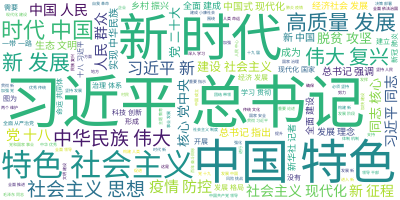

In [47]:
# make a word cloud... https://amueller.github.io/word_cloud/auto_examples/wordcloud_cn.html - one link, didn't seem to work
from wordcloud import WordCloud

long_string = ' '.join(list(articles["spaced_text_wo_stopwords"]))

font_path = '/Users/calebharding/Documents/BYU/2023-2024/China_Project/qiushi_venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/NotoSansSC-Regular.ttf'

# Create a WordCloud object
wordcloud = WordCloud(font_path=font_path, background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [19]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel

In [49]:
docs = list(articles['cleaned_text_list'])

In [21]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.DEBUG)


In [51]:
# Compute bigrams.
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=20)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

2024-04-05 13:29:30,073 : INFO : collecting all words and their counts
2024-04-05 13:29:30,073 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2024-04-05 13:29:31,674 : INFO : collected 1288360 token types (unigram + bigrams) from a corpus of 3218851 words and 1998 sentences
2024-04-05 13:29:31,674 : INFO : merged Phrases<1288360 vocab, min_count=20, threshold=10.0, max_vocab_size=40000000>
2024-04-05 13:29:31,675 : DEBUG : starting a new internal lifecycle event log for Phrases
2024-04-05 13:29:31,675 : INFO : Phrases lifecycle event {'msg': 'built Phrases<1288360 vocab, min_count=20, threshold=10.0, max_vocab_size=40000000> in 1.60s', 'datetime': '2024-04-05T13:29:31.675283', 'gensim': '4.3.2', 'python': '3.11.6 (main, Nov  2 2023, 04:39:43) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.0-arm64-arm-64bit', 'event': 'created'}


In [52]:
docs[0]

['辩证唯物主义',
 '中国共产党',
 '世界观',
 '方法论',
 '习近平',
 '2018',
 '5',
 '4',
 '纪念',
 '马克思',
 '诞辰',
 '200',
 '周年',
 '大会',
 '北京人民大会堂',
 '隆重举行',
 '中共中央',
 '总书记',
 '国家',
 '主席',
 '中央军委',
 '主席',
 '习近平',
 '大会',
 '发表',
 '重要讲话',
 '新华社',
 '记者',
 '鞠鹏',
 '／',
 '摄',
 '2018',
 '9',
 '25',
 '日至',
 '28',
 '习近平',
 '总书记',
 '东北三省',
 '考察',
 '主持',
 '召开',
 '深入',
 '推进',
 '东北',
 '振兴',
 '座谈会',
 '这是',
 '25',
 '下午',
 '习近平',
 '总书记',
 '黑龙江',
 '农垦',
 '建三江',
 '管理局',
 '七星',
 '农场',
 '万亩',
 '大地',
 '号',
 '了解',
 '粮食',
 '生产',
 '收获',
 '情况',
 '新华社',
 '记者',
 '谢环驰',
 '／',
 '摄',
 '辩证唯物主义',
 '中国共产党',
 '世界观',
 '方法论',
 '毛泽东',
 '同志',
 '曾经',
 '马克思主义',
 '几门',
 '学问',
 '基础',
 '东西',
 '马克思主义',
 '哲学',
 '革命战争',
 '年代',
 '写下',
 '反对',
 '本本主义',
 '实践论',
 '矛盾论',
 '著作',
 '社会主义',
 '建设',
 '时期',
 '写下',
 '十大',
 '关系',
 '正确处理',
 '人民',
 '内部矛盾',
 '问题',
 '著作',
 '灵活运用',
 '辩证唯物主义',
 '世界观',
 '方法论',
 '形成',
 '具有',
 '鲜明',
 '中国',
 '特色',
 '马克思主义',
 '哲学思想',
 '党',
 '掌握',
 '运用',
 '辩证唯物主义',
 '树立',
 '光辉',
 '典范',
 '邓小平',
 '同志',
 '非常',
 '善于',
 '运用',
 '辩证唯物主义',
 '解决',
 '实际',
 '问题'

In [53]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

2024-04-05 13:29:33,988 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-04-05 13:29:35,311 : INFO : built Dictionary<106065 unique tokens: ['1', '200', '200_周年', '2015', '2018']...> from 1998 documents (total 3707819 corpus positions)
2024-04-05 13:29:35,311 : DEBUG : starting a new internal lifecycle event log for Dictionary
2024-04-05 13:29:35,312 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<106065 unique tokens: ['1', '200', '200_周年', '2015', '2018']...> from 1998 documents (total 3707819 corpus positions)", 'datetime': '2024-04-05T13:29:35.311914', 'gensim': '4.3.2', 'python': '3.11.6 (main, Nov  2 2023, 04:39:43) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.0-arm64-arm-64bit', 'event': 'created'}
2024-04-05 13:29:35,347 : INFO : discarding 90616 tokens: [('200_周年', 18), ('一气', 3), ('七星', 14), ('七星_农场', 6), ('不停顿', 15), ('不受', 5), ('不断', 1542), ('不若行', 1), ('不若闻', 1), ('不闻', 1)]...
2024-04-05 13:29:35,347 : INFO : keeping 15449 

In [54]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [55]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 15449
Number of documents: 1998


In [61]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 4
chunksize = 2100
passes = 20
iterations = 400
eval_every = 0  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

2024-04-05 13:31:45,023 : INFO : using autotuned alpha, starting with [0.25, 0.25, 0.25, 0.25]
2024-04-05 13:31:45,025 : INFO : using serial LDA version on this node
2024-04-05 13:31:45,028 : INFO : running online (multi-pass) LDA training, 4 topics, 20 passes over the supplied corpus of 1998 documents, updating model once every 1998 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2024-04-05 13:31:45,028 : INFO : PROGRESS: pass 0, at document #1998/1998
2024-04-05 13:31:45,028 : DEBUG : performing inference on a chunk of 1998 documents
2024-04-05 13:31:51,970 : DEBUG : 222/1998 documents converged within 400 iterations
2024-04-05 13:31:51,974 : INFO : optimized alpha [0.24452215, 0.26109922, 0.18868098, 0.28300247]
2024-04-05 13:31:51,974 : DEBUG : updating topics
2024-04-05 13:31:51,976 : INFO : topic #0 (0.245): 0.005*"教育" + 0.003*"疫情" + 0.003*"防控" + 0.003*"马克思主义" + 0.002*"治理" + 0.002*"革命" + 0.002*"脱贫" + 0.002*"维护" + 0.002*"

In [63]:
from pprint import pprint

pprint(model.print_topics())

2024-04-05 13:32:26,066 : INFO : topic #0 (0.063): 0.009*"疫情" + 0.007*"教育" + 0.007*"法治" + 0.006*"防控" + 0.005*"干部" + 0.004*"疫情_防控" + 0.004*"完善" + 0.004*"监督" + 0.004*"治理" + 0.004*"落实"
2024-04-05 13:32:26,067 : INFO : topic #1 (0.063): 0.007*"科技" + 0.006*"加快" + 0.005*"高质量" + 0.004*"产业" + 0.004*"全球" + 0.004*"企业" + 0.004*"增长" + 0.004*"合作" + 0.004*"安全" + 0.003*"促进"
2024-04-05 13:32:26,067 : INFO : topic #2 (0.090): 0.007*"马克思主义" + 0.005*"革命" + 0.004*"民族" + 0.004*"百年" + 0.003*"奋斗" + 0.003*"道路" + 0.003*"人类" + 0.003*"自信" + 0.003*"斗争" + 0.003*"毛泽东"
2024-04-05 13:32:26,068 : INFO : topic #3 (0.076): 0.007*"脱贫" + 0.006*"生态" + 0.004*"文明" + 0.004*"保护" + 0.004*"扶贫" + 0.003*"村" + 0.003*"攻坚" + 0.003*"乡村" + 0.003*"脱贫_攻坚" + 0.003*"产业"


[(0,
  '0.009*"疫情" + 0.007*"教育" + 0.007*"法治" + 0.006*"防控" + 0.005*"干部" + '
  '0.004*"疫情_防控" + 0.004*"完善" + 0.004*"监督" + 0.004*"治理" + 0.004*"落实"'),
 (1,
  '0.007*"科技" + 0.006*"加快" + 0.005*"高质量" + 0.004*"产业" + 0.004*"全球" + '
  '0.004*"企业" + 0.004*"增长" + 0.004*"合作" + 0.004*"安全" + 0.003*"促进"'),
 (2,
  '0.007*"马克思主义" + 0.005*"革命" + 0.004*"民族" + 0.004*"百年" + 0.003*"奋斗" + '
  '0.003*"道路" + 0.003*"人类" + 0.003*"自信" + 0.003*"斗争" + 0.003*"毛泽东"'),
 (3,
  '0.007*"脱贫" + 0.006*"生态" + 0.004*"文明" + 0.004*"保护" + 0.004*"扶贫" + 0.003*"村" '
  '+ 0.003*"攻坚" + 0.003*"乡村" + 0.003*"脱贫_攻坚" + 0.003*"产业"')]


In [64]:
top_topics = model.top_topics(corpus)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)


2024-04-05 13:34:51,125 : DEBUG : Setting topics to those of the model: LdaModel<num_terms=15449, num_topics=4, decay=0.5, chunksize=2100>
2024-04-05 13:34:51,193 : INFO : CorpusAccumulator accumulated stats from 1000 documents


Average topic coherence: -0.6829.


In [75]:
results = '''
[(0,
  '0.009*"疫情" + 0.007*"教育" + 0.007*"法治" + 0.006*"防控" + 0.005*"干部" + '
  '0.004*"疫情_防控" + 0.004*"完善" + 0.004*"监督" + 0.004*"治理" + 0.004*"落实"'),
 (1,
  '0.007*"科技" + 0.006*"加快" + 0.005*"高质量" + 0.004*"产业" + 0.004*"全球" + '
  '0.004*"企业" + 0.004*"增长" + 0.004*"合作" + 0.004*"安全" + 0.003*"促进"'),
 (2,
  '0.007*"马克思主义" + 0.005*"革命" + 0.004*"民族" + 0.004*"百年" + 0.003*"奋斗" + '
  '0.003*"道路" + 0.003*"人类" + 0.003*"自信" + 0.003*"斗争" + 0.003*"毛泽东"'),
 (3,
  '0.007*"脱贫" + 0.006*"生态" + 0.004*"文明" + 0.004*"保护" + 0.004*"扶贫" + 0.003*"村" '
  '+ 0.003*"攻坚" + 0.003*"乡村" + 0.003*"脱贫_攻坚" + 0.003*"产业"')]
  '''

results = results.replace("*\"", ", ", -1)
results = results.replace("\" + ", "\n")
results = results.replace("\'),", "")
results = results.replace("\'", "")
results = results.replace("\"", "")
# print(results)


[(0,
  0.009, 疫情
0.007, 教育
0.007, 法治
0.006, 防控
0.005, 干部

  0.004, 疫情_防控
0.004, 完善
0.004, 监督
0.004, 治理
0.004, 落实
 (1,
  0.007, 科技
0.006, 加快
0.005, 高质量
0.004, 产业
0.004, 全球

  0.004, 企业
0.004, 增长
0.004, 合作
0.004, 安全
0.003, 促进
 (2,
  0.007, 马克思主义
0.005, 革命
0.004, 民族
0.004, 百年
0.003, 奋斗

  0.003, 道路
0.003, 人类
0.003, 自信
0.003, 斗争
0.003, 毛泽东
 (3,
  0.007, 脱贫
0.006, 生态
0.004, 文明
0.004, 保护
0.004, 扶贫
0.003, 村 
  + 0.003, 攻坚
0.003, 乡村
0.003, 脱贫_攻坚
0.003, 产业)]
  


Note: Use this slightly converted output, and then finish entering it into a csv format

In [103]:
import seaborn as sns

qs_4_topic = pd.read_csv('qs_4topic.csv')
qs_4_topic.to_excel('qs_4_topic.xlsx')
qs_4_topic


,topic,score,word
0,0,0.009,疫情
1,0,0.007,教育
2,0,0.007,法治
3,0,0.006,防控
4,0,0.005,干部
5,0,0.004,疫情_防控
6,0,0.004,完善
7,0,0.004,监督
8,0,0.004,治理
9,0,0.004,落实


# ASX

In [70]:
import pandas as pd

asx_articles = pd.read_csv('/Users/calebharding/Documents/BYU/2023-2024/China_Project/articles/process_articles/process_asx_articles/processed_asx_articles.csv')
len(asx_articles)

13361

In [71]:
asx_articles.head(1)

,title,authors,date,url,text,year,quarter,year_quarter,cleaned_text,cleaned_text_wspaces
0,告别国家法一元论,强世功,2019-01-01,https://www.aisixiang.com/data/114287.html,在1995年发表的《秋菊的困惑和三杠爷的悲剧》这篇法律社会学经典论文中，苏力在法学界率先采...,2019,1,2019 Q1,在1995年发表的秋菊的困惑和三杠爷的悲剧这篇法律社会学经典论文中苏力在法学界率先采用了法律...,在 1995 年 发表 的 秋菊 的 困惑 和 三杠 爷 的 悲剧 这篇 法律 社会学 经典...


In [72]:
asx_articles.dropna(subset=['cleaned_text'], inplace=True)
asx_articles.isna().sum()

title                    0
authors                 93
date                     0
url                      0
text                     0
year                     0
quarter                  0
year_quarter             0
cleaned_text             0
cleaned_text_wspaces     0
dtype: int64

In [73]:
import stopwordsiso
from stopwordsiso import stopwords

stopwords_zh = stopwords(["zh"])
stopwords_zh.add("…")
stopwords_zh.add("—")
stopwords_zh.add("-")
stopwords_zh.add("[")
stopwords_zh.add("\"")
stopwords_zh.add("]")
stopwords_zh.add("·")
stopwords_zh.add(",")
stopwords_zh.add("(")
stopwords_zh.add(")")
stopwords_zh.add(".")
for i in range(0, 10):
    stopwords_zh.add(i)

def remove_stopwords(row_text):
    try:
        return [word for word in row_text.split(" ") if word not in stopwords_zh]
    except:
        print(f"Failed to remove stopwords on: {row_text}")
        return ""

In [74]:
asx_articles['cleaned_text_list'] = asx_articles['cleaned_text_wspaces'].apply(lambda row_text: remove_stopwords(row_text))

In [75]:
asx_docs = list(asx_articles['cleaned_text_list'])

In [76]:
# Compute bigrams.
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
asx_bigram = Phrases(asx_docs, min_count=20)


2024-04-05 16:17:24,685 : INFO : collecting all words and their counts
2024-04-05 16:17:24,686 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2024-04-05 16:17:44,170 : INFO : PROGRESS: at sentence #10000, processed 26064230 words and 11937198 word types
2024-04-05 16:17:49,849 : INFO : collected 14520310 token types (unigram + bigrams) from a corpus of 33346941 words and 13356 sentences
2024-04-05 16:17:49,849 : INFO : merged Phrases<14520310 vocab, min_count=20, threshold=10.0, max_vocab_size=40000000>
2024-04-05 16:17:49,850 : DEBUG : starting a new internal lifecycle event log for Phrases
2024-04-05 16:17:49,850 : INFO : Phrases lifecycle event {'msg': 'built Phrases<14520310 vocab, min_count=20, threshold=10.0, max_vocab_size=40000000> in 25.17s', 'datetime': '2024-04-05T16:17:49.850382', 'gensim': '4.3.2', 'python': '3.11.6 (main, Nov  2 2023, 04:39:43) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.0-arm64-arm-64bit', 'event': 'created'}


In [77]:
for idx in range(len(asx_docs)):
    for token in asx_bigram[asx_docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            asx_docs[idx].append(token)

In [78]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
asx_dictionary = Dictionary(asx_docs)

# Filter out words that occur less than 120 documents, or more than 50% of the documents.
asx_dictionary.filter_extremes(no_below=120, no_above=0.5)

2024-04-05 16:18:24,650 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2024-04-05 16:18:35,168 : INFO : adding document #10000 to Dictionary<689763 unique tokens: ['&', '*', '*_*', '1', '10']...>
2024-04-05 16:18:38,392 : INFO : built Dictionary<786986 unique tokens: ['&', '*', '*_*', '1', '10']...> from 13356 documents (total 36422321 corpus positions)
2024-04-05 16:18:38,393 : DEBUG : starting a new internal lifecycle event log for Dictionary
2024-04-05 16:18:38,393 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<786986 unique tokens: ['&', '*', '*_*', '1', '10']...> from 13356 documents (total 36422321 corpus positions)", 'datetime': '2024-04-05T16:18:38.393010', 'gensim': '4.3.2', 'python': '3.11.6 (main, Nov  2 2023, 04:39:43) [Clang 14.0.3 (clang-1403.0.22.14.1)]', 'platform': 'macOS-13.0-arm64-arm-64bit', 'event': 'created'}
2024-04-05 16:18:38,759 : INFO : discarding 768549 tokens: [('*_*', 55), ('1154', 5), ('13_参见', 80), ('14_参见', 89), ('15_参见', 

In [79]:
# Bag-of-words representation of the documents.
asx_corpus = [asx_dictionary.doc2bow(doc) for doc in asx_docs]

In [80]:
print('Number of unique tokens: %d' % len(asx_dictionary))
print('Number of documents: %d' % len(asx_corpus))

Number of unique tokens: 18437
Number of documents: 13356


In [81]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
asx_chunksize = 13400
passes = 20
iterations = 400
eval_every = 0  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
asx_temp = asx_dictionary[0]  # This is only to "load" the dictionary.
asx_id2word = asx_dictionary.id2token

asx_model = LdaModel(
    corpus=asx_corpus,
    id2word=asx_id2word,
    chunksize=asx_chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

2024-04-05 16:18:48,157 : INFO : using autotuned alpha, starting with [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
2024-04-05 16:18:48,159 : INFO : using serial LDA version on this node
2024-04-05 16:18:48,167 : INFO : running online (multi-pass) LDA training, 10 topics, 20 passes over the supplied corpus of 13356 documents, updating model once every 13356 documents, evaluating perplexity every 0 documents, iterating 400x with a convergence threshold of 0.001000
2024-04-05 16:18:48,219 : INFO : PROGRESS: pass 0, at document #13356/13356
2024-04-05 16:18:48,220 : DEBUG : performing inference on a chunk of 13356 documents
2024-04-05 16:23:17,223 : DEBUG : 925/13356 documents converged within 400 iterations
2024-04-05 16:23:17,287 : INFO : optimized alpha [0.08146299, 0.057097282, 0.08463255, 0.086506985, 0.08305582, 0.07477267, 0.099516414, 0.08201129, 0.07941602, 0.10020727]
2024-04-05 16:23:17,292 : DEBUG : updating topics
2024-04-05 16:23:17,312 : INFO : topic #1 (0.057): 0.006*

In [82]:
from pprint import pprint

pprint(asx_model.print_topics())

2024-04-05 16:49:51,692 : INFO : topic #0 (0.080): 0.007*"先生" + 0.005*"写" + 0.005*"讲" + 0.004*"知道" + 0.004*"当时" + 0.004*"想" + 0.004*"很多" + 0.003*"学生" + 0.003*"觉得" + 0.003*"老师"
2024-04-05 16:49:51,696 : INFO : topic #1 (0.054): 0.010*"企业" + 0.008*"技术" + 0.007*"市场" + 0.006*"政府" + 0.005*"我国" + 0.005*"数据" + 0.005*"风险" + 0.005*"数字" + 0.005*"创新" + 0.004*"产业"


2024-04-05 16:49:51,733 : INFO : topic #2 (0.042): 0.009*"学术" + 0.005*"学者" + 0.005*"马克思" + 0.004*"经济学" + 0.004*"方法" + 0.004*"学科" + 0.004*"分析" + 0.004*"资本主义" + 0.004*"社会科学" + 0.003*"西方"
2024-04-05 16:49:51,751 : INFO : topic #3 (0.041): 0.009*"农村" + 0.008*"农民" + 0.008*"土地" + 0.008*"农业" + 0.007*"政府" + 0.007*"收入" + 0.006*"增长" + 0.006*"城市" + 0.006*"市场" + 0.006*"改革"
2024-04-05 16:49:51,763 : INFO : topic #4 (0.043): 0.007*"页" + 0.005*"民族" + 0.004*"日本" + 0.003*"西方" + 0.003*"文明" + 0.003*"近代" + 0.003*"古代" + 0.003*"权力" + 0.003*"革命" + 0.003*":"
2024-04-05 16:49:51,764 : INFO : topic #5 (0.037): 0.009*"佛教" + 0.008*"儒家" + 0.007*"孔子" + 0.007*"道" + 0.007*"宗教" + 0.006*"哲学" + 0.005*"道德" + 0.005*"自然" + 0.005*"孟子" + 0.004*"儒学"
2024-04-05 16:49:51,765 : INFO : topic #6 (0.034): 0.021*"法律" + 0.015*"宪法" + 0.011*"规定" + 0.010*"权利" + 0.010*"行为" + 0.006*"刑法" + 0.006*"行政" + 0.005*"立法" + 0.005*"规范" + 0.005*"法学"
2024-04-05 16:49:51,766 : INFO : topic #7 (0.046): 0.012*"哲学" + 0.008*"人类" + 0.007*"价值" + 0.007*"自由" +

[(0,
  '0.007*"先生" + 0.005*"写" + 0.005*"讲" + 0.004*"知道" + 0.004*"当时" + 0.004*"想" + '
  '0.004*"很多" + 0.003*"学生" + 0.003*"觉得" + 0.003*"老师"'),
 (1,
  '0.010*"企业" + 0.008*"技术" + 0.007*"市场" + 0.006*"政府" + 0.005*"我国" + 0.005*"数据" '
  '+ 0.005*"风险" + 0.005*"数字" + 0.005*"创新" + 0.004*"产业"'),
 (2,
  '0.009*"学术" + 0.005*"学者" + 0.005*"马克思" + 0.004*"经济学" + 0.004*"方法" + '
  '0.004*"学科" + 0.004*"分析" + 0.004*"资本主义" + 0.004*"社会科学" + 0.003*"西方"'),
 (3,
  '0.009*"农村" + 0.008*"农民" + 0.008*"土地" + 0.008*"农业" + 0.007*"政府" + 0.007*"收入" '
  '+ 0.006*"增长" + 0.006*"城市" + 0.006*"市场" + 0.006*"改革"'),
 (4,
  '0.007*"页" + 0.005*"民族" + 0.004*"日本" + 0.003*"西方" + 0.003*"文明" + 0.003*"近代" '
  '+ 0.003*"古代" + 0.003*"权力" + 0.003*"革命" + 0.003*":"'),
 (5,
  '0.009*"佛教" + 0.008*"儒家" + 0.007*"孔子" + 0.007*"道" + 0.007*"宗教" + 0.006*"哲学" '
  '+ 0.005*"道德" + 0.005*"自然" + 0.005*"孟子" + 0.004*"儒学"'),
 (6,
  '0.021*"法律" + 0.015*"宪法" + 0.011*"规定" + 0.010*"权利" + 0.010*"行为" + 0.006*"刑法" '
  '+ 0.006*"行政" + 0.005*"立法" + 0.005*"规范" + 0.005*

In [83]:
asx_top_topics = asx_model.top_topics(asx_corpus)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
asx_avg_topic_coherence = sum([t[1] for t in asx_top_topics]) / num_topics
print('Average topic coherence: %.4f.' % asx_avg_topic_coherence)


2024-04-05 16:49:51,776 : DEBUG : Setting topics to those of the model: LdaModel<num_terms=18437, num_topics=10, decay=0.5, chunksize=13400>
2024-04-05 16:49:51,897 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2024-04-05 16:49:51,968 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2024-04-05 16:49:52,042 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2024-04-05 16:49:52,110 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2024-04-05 16:49:52,184 : INFO : CorpusAccumulator accumulated stats from 5000 documents
2024-04-05 16:49:52,251 : INFO : CorpusAccumulator accumulated stats from 6000 documents
2024-04-05 16:49:52,315 : INFO : CorpusAccumulator accumulated stats from 7000 documents
2024-04-05 16:49:52,382 : INFO : CorpusAccumulator accumulated stats from 8000 documents
2024-04-05 16:49:52,449 : INFO : CorpusAccumulator accumulated stats from 9000 documents
2024-04-05 16:49:52,518 : INFO : CorpusAccumulator accumul

Average topic coherence: -0.8737.


In [84]:
asx_topics = pd.DataFrame(columns=['Topic', 'Score', 'Term'])

for topic_number, topic in enumerate(asx_top_topics):
    for term in topic[0]:
        asx_topics.loc[len(asx_topics)] = [topic_number + 1, term[0], term[1]]

asx_topics.to_excel('asx_10_topic.xlsx', index=False)